In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import datetime as dt
import matplotlib.pyplot as plt

In [2]:
od = pd.read_csv("Originations_Data.csv")
bd = pd.read_csv("Behaviour_Data.csv")

C:\Users\Dell\AppData\Local\Temp\ipykernel_20392\2475845299.py:1: DtypeWarning: Columns (26,28) have mixed types. Specify dtype option on import or set low_memory=False.
  od = pd.read_csv("Originations_Data.csv")


In [3]:
od.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 141735 entries, 0 to 141734
Data columns (total 31 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   Credit Score                      141735 non-null  int64  
 1   First Payment Date                141735 non-null  int64  
 2   First Time Homebuyer Flag         141735 non-null  object 
 3   Maturity Date                     141735 non-null  int64  
 4   Metropolitan Statistical Area     128622 non-null  float64
 5   Mortgage Insurance Percentage     141735 non-null  int64  
 6   Number of Units                   141735 non-null  int64  
 7   Occupancy Status                  141735 non-null  object 
 8   Original Combined Loan-to-Value   141735 non-null  int64  
 9   Original Debt-to-Income Ratio     141735 non-null  int64  
 10  Original UPB                      141735 non-null  int64  
 11  Original Loan-to-Value            141735 non-null  i

In [4]:
od.isnull().sum()

Credit Score                             0
First Payment Date                       0
First Time Homebuyer Flag                0
Maturity Date                            0
Metropolitan Statistical Area        13113
Mortgage Insurance Percentage            0
Number of Units                          0
Occupancy Status                         0
Original Combined Loan-to-Value          0
Original Debt-to-Income Ratio            0
Original UPB                             0
Original Loan-to-Value                   0
Original Interest Rate                   0
Channel                                  0
Prepayment Penalty Mortgage Flag         0
Amortization Type                        0
Property State                           0
Property Type                            0
Postal Code                              0
Loan Sequence Number                     0
Loan Purpose                             0
Original Loan Term                       0
Number of Borrowers                      0
Seller Name

In [5]:
od.drop(['HARP Indicator','Pre-HARP Loan Sequence Number','Super Conforming Flag'],axis=1,inplace=True)

In [6]:
od['Metropolitan Statistical Area'] = od.groupby('Postal Code')['Metropolitan Statistical Area'].transform(lambda x: x.fillna(method='ffill'))
od['Metropolitan Statistical Area'] = od.groupby('Postal Code')['Metropolitan Statistical Area'].transform(lambda x: x.fillna(method='bfill'))

In [7]:
od['Metropolitan Statistical Area'] = od['Metropolitan Statistical Area'].fillna(round(od['Metropolitan Statistical Area'].mean(),0))

In [8]:
od.isna().sum()

Credit Score                        0
First Payment Date                  0
First Time Homebuyer Flag           0
Maturity Date                       0
Metropolitan Statistical Area       0
Mortgage Insurance Percentage       0
Number of Units                     0
Occupancy Status                    0
Original Combined Loan-to-Value     0
Original Debt-to-Income Ratio       0
Original UPB                        0
Original Loan-to-Value              0
Original Interest Rate              0
Channel                             0
Prepayment Penalty Mortgage Flag    0
Amortization Type                   0
Property State                      0
Property Type                       0
Postal Code                         0
Loan Sequence Number                0
Loan Purpose                        0
Original Loan Term                  0
Number of Borrowers                 0
Seller Name                         0
Servicer Name                       0
Program Indicator                   0
Property Val

In [9]:
od['Loan Sequence Number'].count()

141735

In [10]:
#Finding duplicates 
od.duplicated().sum()

0

In [11]:
od['Loan Sequence Number'].nunique()

141735

In [12]:
"""
indicator denoting whether a borrower on the loan qualifies as a firsttime homebuyer.

"""

od['First Time Homebuyer Flag'].value_counts()

First Time Homebuyer Flag
N    111703
Y     30032
Name: count, dtype: int64

In [13]:
 """ P= Primary Residence
S - Second Home
I = Investment Property """

od['Occupancy Status'].value_counts()

Occupancy Status
P    126677
I      9403
S      5655
Name: count, dtype: int64

In [14]:
""" 

For reperforming, modified fixed-rate and modified step-rate loans, the origination channel used by the party 
that delivered the loan to the issuer

R = Retail
B = Broker
C = Correspondent
T = Third Party Origination - Not Specified

"""

od['Channel'].value_counts()

Channel
R    78728
C    46458
B    16549
Name: count, dtype: int64

In [15]:
## The indicator denoting whether the borrower is subject to a penalty for early payment of principal.

od['Prepayment Penalty Mortgage Flag'].value_counts()

Prepayment Penalty Mortgage Flag
N    141735
Name: count, dtype: int64

In [16]:
"""
The classification of the loan as having either a fixed- or an adjustable-interest rate at the time the loan was 
originated or modified.

FRM = Fixed-Rate
ARM = Adjustable-Rate

"""

od['Amortization Type'].value_counts()

Amortization Type
FRM    141735
Name: count, dtype: int64

In [17]:
"""

The abbreviation denoting the location of the property securing the loan

"""

od['Property State'].value_counts()

Property State
CA    17356
TX    10738
FL     9187
IL     6263
OH     5276
MI     5263
AZ     5118
WA     4564
GA     4508
CO     4500
NC     4327
NY     4130
PA     3894
VA     3873
NJ     3784
IN     3616
MN     3364
MA     3209
TN     2833
MO     2805
UT     2766
MD     2677
WI     2672
OR     2615
SC     2188
KY     1812
NV     1779
AL     1515
LA     1407
OK     1259
CT     1234
ID     1174
KS     1171
IA     1155
AR      938
NH      732
NE      603
NM      570
ME      538
DE      488
MS      486
MT      485
RI      410
WV      387
HI      361
ND      303
DC      300
SD      297
VT      288
AK      265
WY      199
GU       23
PR       16
VI       14
Name: count, dtype: int64

In [18]:
"""
 The classification describing the type of property that secures the loan. CP = Cooperative
CO = Condominium
PU = Planned Unit 
Development
SF = Single-Family
MH = Manufactured 
Housing
99 = Not Available

"""

od['Property Type'].value_counts()

Property Type
SF    89128
PU    40090
CO    11753
MH      565
CP      199
Name: count, dtype: int64

In [19]:
"""
For reperforming, modified fixed-rate and modified step-rate loans, the classification of the loan as either a 
purchase money mortgage or a refinance mortgage at the time the loan was originated.
C = Refinance - Cash Out
N = Refinance - No Cash 
Out
R = Refinance - Not 
Specified
P = Purchase
M = Modified - Loss 
Mitigation
9 = Not Available

"""

od['Loan Purpose'].value_counts()

Loan Purpose
P    74256
N    38872
C    28607
Name: count, dtype: int64

In [20]:
"""
The number of borrowers who, at the time the loan was originated, are obligated to repay the loan.

"""

od['Number of Borrowers'].value_counts()

Number of Borrowers
1    74768
2    65810
3     1011
4      144
5        2
Name: count, dtype: int64

In [21]:
"""
The number of dwelling units in the mortgaged property at the time the loan was 
originated

"""

od['Number of Units'].value_counts()

Number of Units
1    138824
2      2077
3       480
4       354
Name: count, dtype: int64

In [22]:
od['Metropolitan Statistical Area'].describe()

count    141735.000000
mean      30140.839524
std       11115.313971
min       10180.000000
25%       19660.000000
50%       31084.000000
75%       39460.000000
max       49740.000000
Name: Metropolitan Statistical Area, dtype: float64

In [23]:
# Print statistics for 'Metropolitan Statistical Area'

print("Mean: ",od['Metropolitan Statistical Area'].mean())
print("Standard Deviation: ",od['Metropolitan Statistical Area'].std())
print("Minimum: ",od['Metropolitan Statistical Area'].min())
print("Maximum: ",od['Metropolitan Statistical Area'].max())
print("1st percentile:", np.percentile(od['Metropolitan Statistical Area'], 1))
print("5th percentile:", np.percentile(od['Metropolitan Statistical Area'], 5))
print("10th percentile:", np.percentile(od['Metropolitan Statistical Area'], 10))
print("25th percentile:", np.percentile(od['Metropolitan Statistical Area'], 25))
print("50th percentile (median):", np.percentile(od['Metropolitan Statistical Area'], 50))
print("75th percentile:", np.percentile(od['Metropolitan Statistical Area'], 75))
print("90th percentile:", np.percentile(od['Metropolitan Statistical Area'], 90))
print("95th percentile:", np.percentile(od['Metropolitan Statistical Area'], 95))
print("99th percentile:", np.percentile(od['Metropolitan Statistical Area'], 99))

Mean:  30140.83952446467
Standard Deviation:  11115.313970977399
Minimum:  10180.0
Maximum:  49740.0
1st percentile: 10900.0
5th percentile: 12060.0
10th percentile: 14454.0
25th percentile: 19660.0
50th percentile (median): 31084.0
75th percentile: 39460.0
90th percentile: 45060.0
95th percentile: 47664.0
99th percentile: 49020.0


In [24]:
# Print statistics for 'Mortgage Insurance Percentage'

print("Mean: ", od['Mortgage Insurance Percentage'].mean())
print("Standard Deviation: ", od['Mortgage Insurance Percentage'].std())
print("Minimum: ", od['Mortgage Insurance Percentage'].min())
print("Maximum: ", od['Mortgage Insurance Percentage'].max())
print("1st percentile:", np.percentile(od['Mortgage Insurance Percentage'], 1))
print("5th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 5))
print("10th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 10))
print("25th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 25))
print("50th percentile (median):", np.percentile(od['Mortgage Insurance Percentage'], 50))
print("75th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 75))
print("90th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 90))
print("95th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 95))
print("99th percentile:", np.percentile(od['Mortgage Insurance Percentage'], 99))

Mean:  7.365259110311497
Standard Deviation:  11.815103502576257
Minimum:  0
Maximum:  35
1st percentile: 0.0
5th percentile: 0.0
10th percentile: 0.0
25th percentile: 0.0
50th percentile (median): 0.0
75th percentile: 16.0
90th percentile: 30.0
95th percentile: 30.0
99th percentile: 30.0


In [25]:
# Print statistics for 'Original Combined Loan-to-Value'

print("Mean: ", od['Original Combined Loan-to-Value'].mean())
print("Standard Deviation: ", od['Original Combined Loan-to-Value'].std())
print("Minimum: ", od['Original Combined Loan-to-Value'].min())
print("Maximum: ", od['Original Combined Loan-to-Value'].max())
print("1st percentile:", np.percentile(od['Original Combined Loan-to-Value'], 1))
print("5th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 5))
print("10th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 10))
print("25th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 25))
print("50th percentile (median):", np.percentile(od['Original Combined Loan-to-Value'], 50))
print("75th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 75))
print("90th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 90))
print("95th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 95))
print("99th percentile:", np.percentile(od['Original Combined Loan-to-Value'], 99))

Mean:  74.74311920132642
Standard Deviation:  17.768062323782175
Minimum:  5
Maximum:  999
1st percentile: 24.0
5th percentile: 40.0
10th percentile: 50.0
25th percentile: 66.0
50th percentile (median): 80.0
75th percentile: 88.0
90th percentile: 95.0
95th percentile: 95.0
99th percentile: 97.0


In [26]:
# Print statistics for 'Original Debt-to-Income Ratio'

print("Mean: ", od['Original Debt-to-Income Ratio'].mean())
print("Standard Deviation: ", od['Original Debt-to-Income Ratio'].std())
print("Minimum: ", od['Original Debt-to-Income Ratio'].min())
print("Maximum: ", od['Original Debt-to-Income Ratio'].max())
print("1st percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 1))
print("5th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 5))
print("10th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 10))
print("25th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 25))
print("50th percentile (median):", np.percentile(od['Original Debt-to-Income Ratio'], 50))
print("75th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 75))
print("90th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 90))
print("95th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 95))
print("99th percentile:", np.percentile(od['Original Debt-to-Income Ratio'], 99))

Mean:  38.773422231629446
Standard Deviation:  61.864809755738996
Minimum:  1
Maximum:  999
1st percentile: 12.0
5th percentile: 18.0
10th percentile: 21.0
25th percentile: 28.0
50th percentile (median): 36.0
75th percentile: 43.0
90th percentile: 47.0
95th percentile: 49.0
99th percentile: 50.0


In [27]:
# Print statistics for 'Original UPB'

print("Mean: ", od['Original UPB'].mean())
print("Standard Deviation: ", od['Original UPB'].std())
print("Minimum: ", od['Original UPB'].min())
print("Maximum: ", od['Original UPB'].max())
print("1st percentile:", np.percentile(od['Original UPB'], 1))
print("5th percentile:", np.percentile(od['Original UPB'], 5))
print("10th percentile:", np.percentile(od['Original UPB'], 10))
print("25th percentile:", np.percentile(od['Original UPB'], 25))
print("50th percentile (median):", np.percentile(od['Original UPB'], 50))
print("75th percentile:", np.percentile(od['Original UPB'], 75))
print("90th percentile:", np.percentile(od['Original UPB'], 90))
print("95th percentile:", np.percentile(od['Original UPB'], 95))
print("99th percentile:", np.percentile(od['Original UPB'], 99))


Mean:  256072.48033301585
Standard Deviation:  132472.77834247355
Minimum:  11000
Maximum:  1410000
1st percentile: 52000.0
5th percentile: 82000.0
10th percentile: 105000.0
25th percentile: 155000.0
50th percentile (median): 232000.0
75th percentile: 336000.0
90th percentile: 442000.0
95th percentile: 494000.0
99th percentile: 658660.0000000035


In [28]:
# Print statistics for 'Original Loan-to-Value'

print("Mean: ", od['Original Loan-to-Value'].mean())
print("Standard Deviation: ", od['Original Loan-to-Value'].std())
print("Minimum: ", od['Original Loan-to-Value'].min())
print("Maximum: ", od['Original Loan-to-Value'].max())
print("1st percentile:", np.percentile(od['Original Loan-to-Value'], 1))
print("5th percentile:", np.percentile(od['Original Loan-to-Value'], 5))
print("10th percentile:", np.percentile(od['Original Loan-to-Value'], 10))
print("25th percentile:", np.percentile(od['Original Loan-to-Value'], 25))
print("50th percentile (median):", np.percentile(od['Original Loan-to-Value'], 50))
print("75th percentile:", np.percentile(od['Original Loan-to-Value'], 75))
print("90th percentile:", np.percentile(od['Original Loan-to-Value'], 90))
print("95th percentile:", np.percentile(od['Original Loan-to-Value'], 95))
print("99th percentile:", np.percentile(od['Original Loan-to-Value'], 99))

Mean:  74.50090662151197
Standard Deviation:  17.266112538713582
Minimum:  5
Maximum:  999
1st percentile: 24.0
5th percentile: 40.0
10th percentile: 50.0
25th percentile: 66.0
50th percentile (median): 80.0
75th percentile: 87.0
90th percentile: 95.0
95th percentile: 95.0
99th percentile: 97.0


In [29]:
# Print statistics for  'Original Interest Rate'


print("Mean: ",od['Original Interest Rate'].mean())
print("Standard Deviation: ",od['Original Interest Rate'].std())
print("Minimum: ",od['Original Interest Rate'].min())
print("Maximum: ",od['Original Interest Rate'].max())
print("1st percentile:", np.percentile(od['Original Interest Rate'], 1))
print("5th percentile:", np.percentile(od['Original Interest Rate'], 5))
print("10th percentile:", np.percentile(od['Original Interest Rate'], 10))
print("25th percentile:", np.percentile(od['Original Interest Rate'], 25))
print("50th percentile (median):", np.percentile(od['Original Interest Rate'], 50))
print("75th percentile:", np.percentile(od['Original Interest Rate'], 75))
print("90th percentile:", np.percentile(od['Original Interest Rate'], 90))
print("95th percentile:", np.percentile(od['Original Interest Rate'], 95))
print("99th percentile:", np.percentile(od['Original Interest Rate'], 99))


Mean:  4.127571122164603
Standard Deviation:  0.7963314843280405
Minimum:  1.75
Maximum:  6.75
1st percentile: 2.5
5th percentile: 2.75
10th percentile: 3.0
25th percentile: 3.5
50th percentile (median): 4.139
75th percentile: 4.75
90th percentile: 5.125
95th percentile: 5.375
99th percentile: 5.75


In [30]:
#Print statistics for 'Original Loan Term'

print("Mean: ", od['Original Loan Term'].mean())
print("Standard Deviation: ", od['Original Loan Term'].std())
print("Minimum: ", od['Original Loan Term'].min())
print("Maximum: ", od['Original Loan Term'].max())
print("1st percentile:", np.percentile(od['Original Loan Term'], 1))
print("5th percentile:", np.percentile(od['Original Loan Term'], 5))
print("10th percentile:", np.percentile(od['Original Loan Term'], 10))
print("25th percentile:", np.percentile(od['Original Loan Term'], 25))
print("50th percentile (median):", np.percentile(od['Original Loan Term'], 50))
print("75th percentile:", np.percentile(od['Original Loan Term'], 75))
print("90th percentile:", np.percentile(od['Original Loan Term'], 90))
print("95th percentile:", np.percentile(od['Original Loan Term'], 95))
print("99th percentile:", np.percentile(od['Original Loan Term'], 99))


Mean:  328.4551451652732
Standard Deviation:  66.2371110494269
Minimum:  96
Maximum:  500
1st percentile: 180.0
5th percentile: 180.0
10th percentile: 180.0
25th percentile: 360.0
50th percentile (median): 360.0
75th percentile: 360.0
90th percentile: 360.0
95th percentile: 360.0
99th percentile: 360.0


In [31]:
od['First Payment Date'] = od['First Payment Date'].astype(str)

In [32]:
od['First Payment Date'] = od['First Payment Date'].apply(lambda x: pd.to_datetime(x,format='%Y%m').date())

In [33]:
od['Month'] = od['First Payment Date'].apply(lambda x: pd.to_datetime(x).month_name())

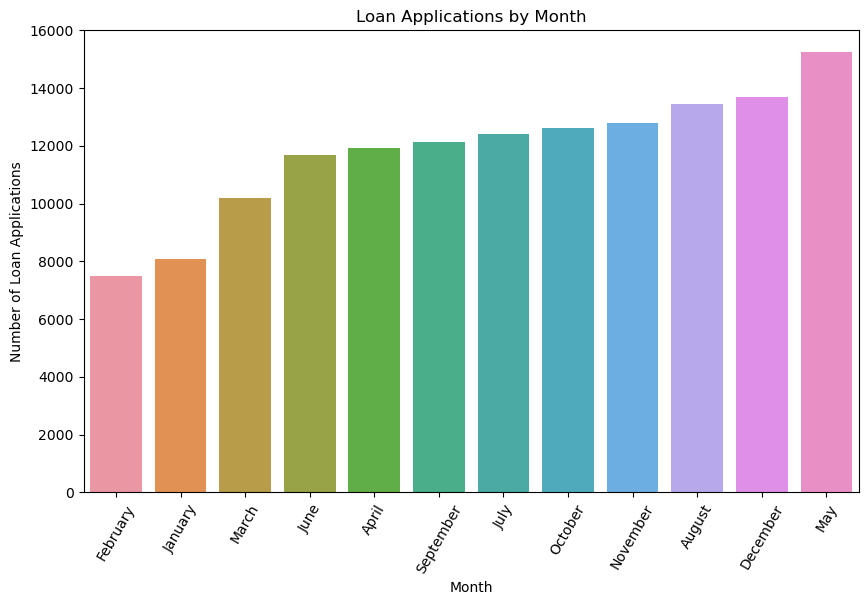

In [34]:
applications = od.groupby('Month')['Loan Sequence Number'].count().sort_values().reset_index()

plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
sns.barplot(data=applications, x='Month', y='Loan Sequence Number')
plt.xticks(rotation=60)
plt.xlabel('Month')
plt.ylabel('Number of Loan Applications')
plt.title('Loan Applications by Month')
plt.show()


In [35]:
applications = od.groupby('Month')['Loan Sequence Number'].count().sort_values().reset_index()
cs = od.groupby('Month')['Credit Score'].mean().sort_values().reset_index()

In [36]:
cs

,Month,Credit Score
0,March,748.886656
1,February,749.314331
2,April,751.730837
3,May,752.561344
4,September,752.934230
5,October,753.164965
6,June,753.859540
7,January,754.080109
8,July,755.420167
9,December,756.453941


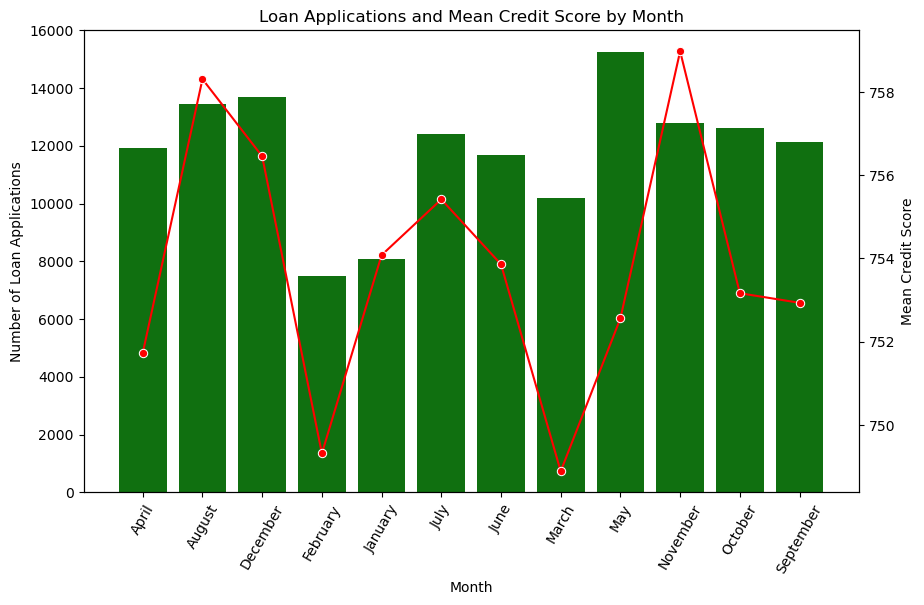

In [37]:
applications = od.groupby('Month')['Loan Sequence Number'].count().sort_index().reset_index()
cs = od.groupby('Month')['Credit Score'].mean().sort_index().reset_index()

# Plotting
plt.figure(figsize=(10, 6))

# Plotting the count of loan applications
ax1 = sns.barplot(data=applications, x='Month', y='Loan Sequence Number', color="green")
ax1.set_ylabel('Number of Loan Applications')
plt.xticks(rotation=60) 

# Creating a secondary y-axis for mean credit score
ax2 = ax1.twinx()
sns.lineplot(data=cs, x='Month', y='Credit Score', ax=ax2, color='r', marker='o')
ax2.set_ylabel('Mean Credit Score')

plt.title('Loan Applications and Mean Credit Score by Month')
plt.show()


In [38]:
merged = od.merge(bd,how="inner",on='Loan Sequence Number')

In [39]:
merged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202107,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate
0,654,2018-03-01,N,204802,14540.0,0,1,P,77,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,693,2018-03-01,N,203302,24340.0,0,1,P,80,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,757,2018-03-01,Y,204802,30141.0,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,807,2018-03-01,N,203302,30141.0,0,1,P,26,38,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,812,2018-03-01,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,2020-12-01,N,204011,11244.0,0,1,P,49,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
141728,785,2020-12-01,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141729,730,2020-12-01,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141730,691,2020-12-01,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**There are total 8262 records in Behaviour data which do not have any inforamtion in Original Data**

In [40]:
tempmerged = od.merge(bd,how="inner",on='Loan Sequence Number')
tempmerged.replace(99,np.nan,inplace=True)

tempmerged['Maximum Delinquency'] = tempmerged.filter(like='Delinquency_Bucket').max(axis=1)

In [41]:
tempmerged

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,Maximum Delinquency
0,654,2018-03-01,N,204802,14540.0,0,1,P,77.0,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
1,693,2018-03-01,N,203302,24340.0,0,1,P,80.0,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
2,757,2018-03-01,Y,204802,30141.0,25,1,P,97.0,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,807,2018-03-01,N,203302,30141.0,0,1,P,26.0,38,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
4,812,2018-03-01,N,203302,19340.0,0,1,P,14.0,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,2020-12-01,N,204011,11244.0,0,1,P,49.0,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0
141728,785,2020-12-01,N,204011,35004.0,0,1,P,63.0,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141729,730,2020-12-01,N,203511,15680.0,0,1,P,52.0,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
141730,691,2020-12-01,N,205011,35980.0,25,1,P,97.0,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [42]:
tempmerged['Maximum Delinquency'].describe()

count    141732.000000
mean          0.412342
std           2.050839
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          43.000000
Name: Maximum Delinquency, dtype: float64

In [43]:
tempmerged['Maximum Delinquency'].value_counts().sort_values()

Maximum Delinquency
33.0         1
43.0         1
34.0         1
31.0         1
30.0         2
28.0         4
26.0         4
29.0         4
27.0         9
25.0        14
24.0        26
23.0        31
22.0        54
21.0        67
19.0        71
20.0        91
16.0       122
18.0       130
15.0       136
14.0       169
13.0       170
10.0       191
9.0        208
17.0       225
8.0        270
12.0       273
11.0       317
7.0        333
6.0        477
4.0        549
5.0        583
3.0       1000
2.0       1351
1.0       6771
0.0     128076
Name: count, dtype: int64

# VIntage Analysis

In [44]:
bd.head(50)

,Loan Sequence Number,Delinquency_Bucket 201802,Delinquency_Bucket 201803,Delinquency_Bucket 201804,Delinquency_Bucket 201805,Delinquency_Bucket 201806,Delinquency_Bucket 201807,Delinquency_Bucket 201808,Delinquency_Bucket 201809,Delinquency_Bucket 201810,...,Delinquency_Bucket 202107,Delinquency_Bucket 202108,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate
0,F18Q10000028,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
1,F18Q10000052,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
2,F18Q10000084,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
3,F18Q10000117,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
4,F18Q10000140,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
5,F18Q10000193,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
6,F18Q10000255,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0000
7,F18Q10000261,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000
8,F18Q10000270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0000
9,F18Q10000272,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000


In [45]:
def CycleBreak(row):
    for col in bd.columns:
        if row[col] == 3:
            return col
    return None           

In [46]:
bd['CycleBreak'] = bd.apply(CycleBreak, axis=1)

In [47]:
Cbreakers = bd.groupby('CycleBreak')['Loan Sequence Number'].count()
Cbreakers.reset_index()

,CycleBreak,Loan Sequence Number
0,Delinquency_Bucket 201806,1
1,Delinquency_Bucket 201807,1
2,Delinquency_Bucket 201809,3
3,Delinquency_Bucket 201810,2
4,Delinquency_Bucket 201811,4
5,Delinquency_Bucket 201812,8
6,Delinquency_Bucket 201901,8
7,Delinquency_Bucket 201902,3
8,Delinquency_Bucket 201903,6
9,Delinquency_Bucket 201904,13


In [48]:
bd['Loan Sequence Number'].count()

149997

In [49]:
bd['AccountType'] = bd['CycleBreak'].apply(lambda x: "Good" if x==None else "Bad")

In [50]:
bd['AccountType'].value_counts()

AccountType
Good    144445
Bad       5552
Name: count, dtype: int64

In [51]:
merg = od.merge(bd,on='Loan Sequence Number',how="inner")

In [52]:
merg[['CycleBreak','First Payment Date']]

,CycleBreak,First Payment Date
0,None,2018-03-01
1,None,2018-03-01
2,None,2018-03-01
3,None,2018-03-01
4,None,2018-03-01
...,...,...
141727,None,2020-12-01
141728,None,2020-12-01
141729,None,2020-12-01
141730,None,2020-12-01


In [53]:
merg['AccountType'].value_counts()

AccountType
Good    136216
Bad       5516
Name: count, dtype: int64

In [54]:
good = 5516/141732*100
print("Percentage Of Bad Accounts: ",round(good,2))
print("Percentage Of  Good Accounts: ",round(100-good,2))

Percentage Of Bad Accounts:  3.89
Percentage Of  Good Accounts:  96.11


In [57]:
merg[merg['CycleBreak']!=0]

,Credit Score,First Payment Date,First Time Homebuyer Flag,Maturity Date,Metropolitan Statistical Area,Mortgage Insurance Percentage,Number of Units,Occupancy Status,Original Combined Loan-to-Value,Original Debt-to-Income Ratio,...,Delinquency_Bucket 202109,Delinquency_Bucket 202110,Delinquency_Bucket 202111,Delinquency_Bucket 202112,Delinquency_Bucket 202201,Delinquency_Bucket 202202,Delinquency_Bucket 202203,LossEstimate,CycleBreak,AccountType
0,654,2018-03-01,N,204802,14540.0,0,1,P,77,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
1,693,2018-03-01,N,203302,24340.0,0,1,P,80,41,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
2,757,2018-03-01,Y,204802,30141.0,25,1,P,97,10,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
3,807,2018-03-01,N,203302,30141.0,0,1,P,26,38,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
4,812,2018-03-01,N,203302,19340.0,0,1,P,14,14,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141727,806,2020-12-01,N,204011,11244.0,0,1,P,49,37,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,None,Good
141728,785,2020-12-01,N,204011,35004.0,0,1,P,63,20,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
141729,730,2020-12-01,N,203511,15680.0,0,1,P,52,47,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
141730,691,2020-12-01,N,205011,35980.0,25,1,P,97,42,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,None,Good
